## Part 1:
- Null hypothesis: There is no significant difference between 3 power types (160W, 180W, 200W) after 5 attempts


- Alternate hypothesis: There is **significant difference** between 3 power types (160W, 180W, 200W) after 5 attempts


- What is the significance level: is a threshold to be set for statistical significant in order to determine null hypothesis or alternate hypotheis. Normally, the significance level < 0.05


- What are the degrees of freedom of model: we need to subtract 1 from the number of group, so it is 2 in this case  because there are 3 types of power.


- What are error terms: or residual: it is the different amount between an observed result and the value predictied by the model, around 5% (0.05)


- What is total DoF: 

## Part 2:

In [1]:
import pandas as pd
import numpy as np
#import model to do anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_excel('/Users/macbook/Downloads/anova_lab_data (1).xlsx', sheet_name='data_collected')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Power         15 non-null     object 
 1   Etching Rate  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


In [4]:
df.columns = df.columns.str.replace(r"Etching Rate", "Etching_Rate")
df.columns = df.columns.str.replace(r"Power ", "Power")

In [5]:
import re
df = df.replace(' W','', regex=True)

In [6]:
df['Power']=df['Power'].apply(pd.to_numeric)

In [7]:
df.head(2)

,Power,Etching_Rate
0,160,5.43
1,180,6.24


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Power         15 non-null     int64  
 1   Etching_Rate  15 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 368.0 bytes


In [9]:
df['Power'].unique()

array([160, 180, 200])

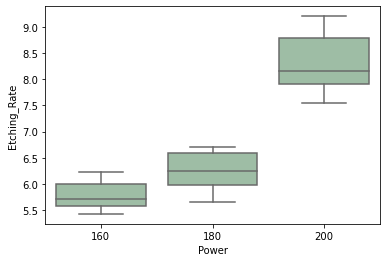

In [14]:
df = sns.boxplot(x='Power', y='Etching_Rate', data=df, color='#99c2a2')

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
model=ols('Etching_Rate ~ C(Power)',data=df).fit()

In [12]:
results_table=sm.stats.anova_lm(model)
results_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Power),2.0,18.176653,9.088327,36.878955,0.000008
Residual,12.0,2.957240,0.246437,NaN,NaN


## Conclusion:

### Because p value < 0.05, so there is a significant different inside the data. In order to look for which feature is significant different than others, we need to employ post adhoc control